<a href="https://colab.research.google.com/github/ktripat/demo-repo1/blob/main/Q1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulate a Nonlinear Function using tensorflow.keras**


In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

The nonlinear function considered here : ***f(x)= exp(-x)***. [Exponential Distribution with a waiting parameter lambda =1]

*   Input range of x: (0,10pi) for the training datasets 

Let's show the function using the scatter plot.

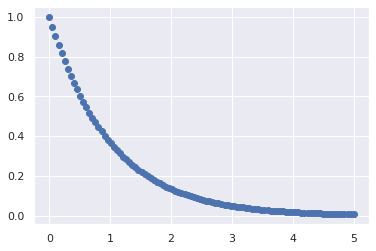

In [56]:
x=np.linspace(0,5,100)
y=np.exp(-x)
plt.scatter(x,y)


**Model #1 Shallow neural network**


*   1 hidden layer with 128 hidden units
*   Activation = ReLU
*   Optimizer = Adam
*   Mean Squared Error (MSE)

Number of epochs = 100


Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5538 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3545 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0698 - accuracy: 

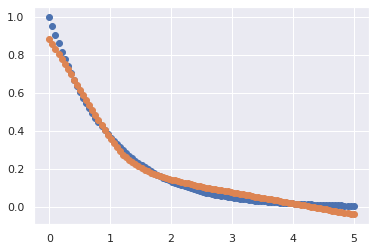

In [57]:
model_shallow=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(1,)),
                                  tf.keras.layers.Dense(812,activation=tf.nn.relu),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1)])
opt=tf.keras.optimizers.Adam(learning_rate=0.02)
model_shallow.compile(optimizer=opt,loss='mse',metrics=['accuracy'])
history_shallow=model_shallow.fit(x,y,epochs=100)
model_shallow.summary()
yp=model_shallow.predict(x)
plt.scatter(x,y)
plt.scatter(x,yp)

Total number of parameters in the neural network = 2437

**Model #1 Shallow neural network (using one hidden layer)**

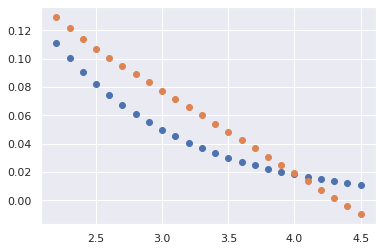

In [58]:
## new testing data
x_test=np.arange(2.2,4.6,0.1)
y_test=model_shallow.predict(x_test)

plt.scatter(x_test,np.exp(-x_test))
plt.scatter(x_test,y_test)

**Model #2 Deep neural network (using 3 hidden layers)**






In [59]:
model_deep=tf.keras.models.Sequential([#tf.keras.layers.Flatten(x),
                                  tf.keras.layers.Dense(16,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(24,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(32,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(24,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(16,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(1)])
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model_deep.compile(optimizer=opt,loss='mse',metrics=['accuracy'])
history_deep=model_deep.fit(x,y,epochs=100)
model_deep.summary()

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.0092
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.0155
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.0092
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.0155
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.0092
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0155
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0061
Epoch 11/100
4/4 

1/1 [==============================] - 0s 113ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


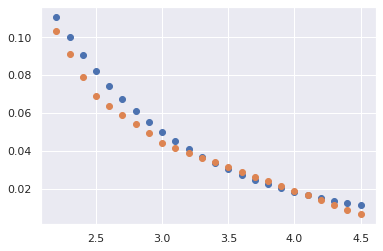

In [60]:
x_test=np.arange(2.2,4.6,0.1)
y_test=model_deep.predict(x_test)
model_deep.evaluate(x_test,y_test)
plt.scatter(x_test,np.exp(-x_test))
plt.scatter(x_test,y_test)


TypeError: ignored

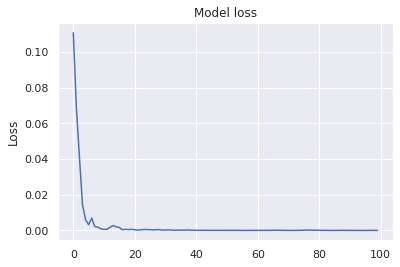

In [61]:
plt.plot(history_deep.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
